### Fashion-MNIST 데이터 셋 분류하기

In [1]:
# 패키지 참조 및 데이터 준비
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

In [2]:
# 학습데이터(train)과 검증데이터(test)를 가져온다.
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
# 가져온 데이터의 차수만 확인
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
# Fashion-MNIST의 레이블에 해당하는 품목을 리스트로 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 그려보기

In [5]:
# 추출할 랜덤값의 수
sample_size = 9

# 학습데이터의 범위에서 무작위로 9개의 정수 추출
random_idx = np.random.randint(x_train.shape[0], size = sample_size)
print(random_idx)

[47919 15931 52134 40535 36785 26695 54941 10879 28788]


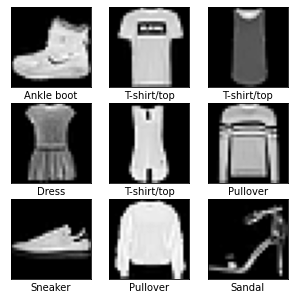

In [6]:
plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
    
plt.show()

### 전처리 및 검증 데이터셋 만들기

In [7]:
# 각 데이터의 값의 범위를 0 ~ 1로 재구성
re_x_train = x_train / 255
re_x_test = x_test / 255

# 각 데이터의 레이블을 범주형 형태로 변경
ca_y_train = to_categorical(y_train)
ca_y_test = to_categorical(y_test)

# 훈련/테스트 데이터를 0.7 / 0.3의 비율로 분리
# -> 기존의 re_x_train, ca_y_train을 각각 re_x_train(7) : re_x_val(3), ca_y_train(7) : ca_y_cal(3) 으로 분리함
re_x_train, re_x_val, ca_y_train, ca_y_val = train_test_split(re_x_train, ca_y_train,
                                                             test_size = 0.3,
                                                             random_state = 777)

### 모델 구성하기

In [8]:
model = Sequential()

In [9]:
# 입력 데이터의 형태를 꼭 명시
# -> 앞 예제와 다르게 배열의 차수 재설정 과정을 생략하고 첫 번째 층에 Flatten 층을 추가
# Flatten : 입력 데이터에서 지정된 input_shape를 자동으로 1차 배열로 변환함.
# 01-mnist에서 진행했던 전처리를 한 줄로 줄임

# model_type 1과 2로 각각 진행해보기
# model_type = 1
model_type = 2

model.add(Flatten(input_shape = (28,28))) # (28, 28) -> .(28 * 28)

if model_type == 2:
    model.add(Dense(128, activation = 'relu'))  # 128개의 출력을 가지는 Dense층

model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense층
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

### 학습 과정 설정

In [10]:
model.compile(optimizer = 'adam', 
             loss = 'categorical_crossentropy',
             metrics = ['acc'])

### 모델 학습하기

In [11]:
# 폴더 안에 logs라는 폴더를 만들어 로그 저장
tensorboard_callback = TensorBoard(log_dir = './logs')

result = model.fit(re_x_train, ca_y_train,
                   epochs = 30, 
                   batch_size = 128,
                   validation_data = (re_x_val, ca_y_val),
                  callbacks = [tensorboard_callback])

Epoch 1/30
  1/329 [..............................] - ETA: 0s - loss: 2.3684 - acc: 0.1016WARNING:tensorflow:From c:\users\ezen\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
329/329 [==============================] - 1s 3ms/step - loss: 0.6069 - acc: 0.7911 - val_loss: 0.4379 - val_acc: 0.8517
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4174 - acc: 0.8538 - val_loss: 0.4097 - val_acc: 0.8562
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3721 - acc: 0.8672 - val_loss: 0.3951 - val_acc: 0.8555
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3404 - acc: 0.8753 - val_loss: 0.3532 - val_acc: 0.8768
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3192 - 

- logs 저장된 폴더에서 cmd 창을 연다.
- tensorboard --logdir=logs 입력
- 마지막에 나오는 웹주소 크롬에 입력!

### history를 통해 확인해볼 수 있는 값 출력하기

In [12]:
# 학습결과(학습 데이터, 검증 데이터, 손실값, 평가지표)를 dictionary로 저장하고 있다.
k = result.history.keys()
k

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 학습 결과 DataFrame 생성하기

In [13]:
result_df = DataFrame(result.history, columns = k)
# 이 데이터를 시각화 하거나, 엑셀 혹은 DataBase에 저장 가능하다.
result_df

,loss,acc,val_loss,val_acc
0,0.606887,0.791095,0.437904,0.851722
1,0.417380,0.853833,0.409670,0.856167
2,0.372145,0.867190,0.395062,0.855500
3,0.340354,0.875286,0.353177,0.876778
4,0.319227,0.883286,0.352952,0.871389
5,0.305429,0.888310,0.346039,0.876556
6,0.289127,0.893143,0.337045,0.879667
7,0.282791,0.896714,0.334139,0.882778
8,0.273331,0.898929,0.329315,0.885278
9,0.260813,0.903333,0.342178,0.877833


### 학습 결과 그려보기

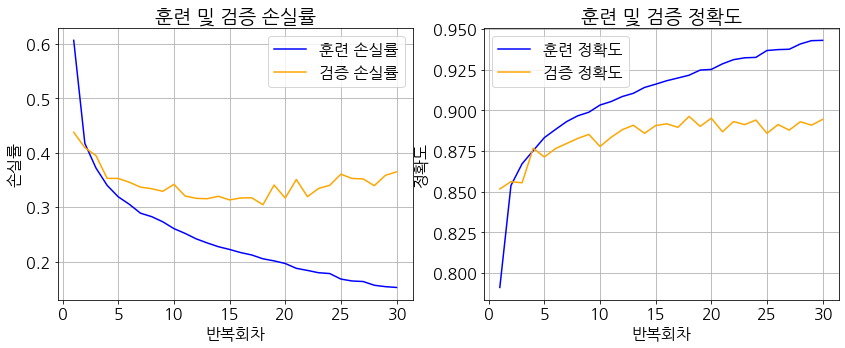

In [14]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (14, 5)

# 그래프를 그리기 위한 객체 생성
fig = plt.figure()

# 1) 훈련 및 검증 손실 그리기

# 훈련 손실률 (y축)
loss = result.history['loss']
# 검증 손실률 (y축)
val_loss = result.history['val_loss']

# 학습회차 (1부터 길이 + 1 전까지) --> x축으로 사용
epochs = range(1, len(loss) + 1)

# 첫 번째 그래프
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = '훈련 손실률')
ax1.plot(epochs, val_loss, color = 'orange', label = '검증 손실률')
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 정확도 그리기

# 훈련 정확도 (y축)
acc = result.history['acc']
# 검증 정확도 (y축)
val_acc = result.history['val_acc']

# 첫 번째 그래프
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = '훈련 정확도')
ax2.plot(epochs, val_acc, color = 'orange', label = '검증 정확도')
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.savefig("%d.png" % model_type)
plt.show()

In [15]:
# 모델 평가하기 --> 최종 손실값과 정확도가 출력된다.
model.evaluate(re_x_test, ca_y_test)

313/313 [==============================] - 0s 819us/step - loss: 0.4283 - acc: 0.8812


[0.42829036712646484, 0.8812000155448914]

### 학습된 모델을 통해 값 예측하기

In [16]:
# set_printoptions -> 출력 옵션 변경 함수.
# precision --> 소수점 자리수를 의미
np.set_printoptions(precision = 7) # numpy 소수점 제한

results = model.predict(re_x_test)

print(results.shape)

(10000, 10)


In [17]:
data_count, case_count = results.shape
print('%d개의 검증 데이터가 %d개의 경우의 수를 갖는다.' % (data_count, case_count))

10000개의 검증 데이터가 10개의 경우의 수를 갖는다.


In [18]:
# 각각의 검증 데이터가 각 경우의 수에 속할 확률
# 각각의 레이블(숫자 0 ~ 9 : 카테고리 1 ~ 10) 중 각각의 레이블에 속할 확률을 나타낸 것
results

array([[8.6391605e-09, 1.9058273e-10, 4.6439121e-16, ..., 1.5259269e-03,
        1.2006246e-10, 9.9847239e-01],
       [9.9084980e-05, 5.9879809e-11, 9.9884415e-01, ..., 3.0154894e-09,
        3.8982875e-12, 4.5458745e-12],
       [1.0583154e-12, 1.0000000e+00, 2.6467358e-16, ..., 1.9035364e-18,
        3.7545494e-21, 2.1620342e-15],
       ...,
       [3.4670651e-07, 8.0282681e-15, 1.4668958e-09, ..., 3.4912622e-13,
        9.9999535e-01, 6.9678931e-13],
       [1.0064954e-11, 9.9999881e-01, 1.4069983e-14, ..., 1.1973938e-16,
        3.9316467e-17, 2.9759496e-12],
       [2.1128263e-10, 1.6433802e-12, 1.5786037e-12, ..., 3.6144134e-05,
        1.8624054e-06, 6.3540007e-08]], dtype=float32)

In [19]:
# 가장 큰 확률 값의 인덱스 리스트
arg_results = np.argmax(results, axis = -1)
arg_results

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

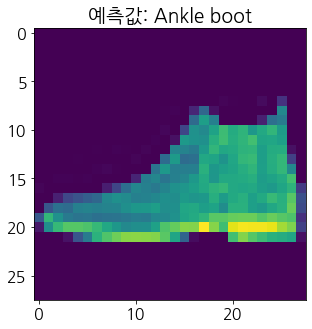

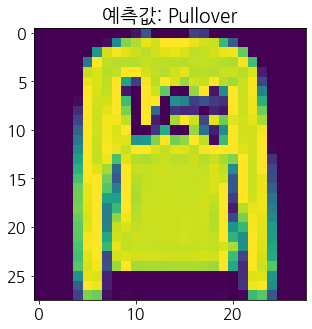

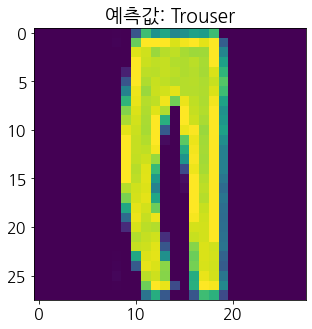

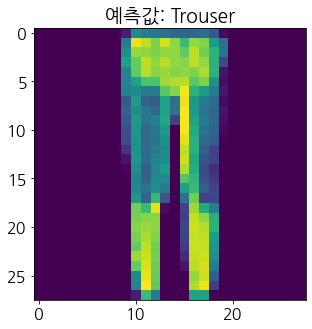

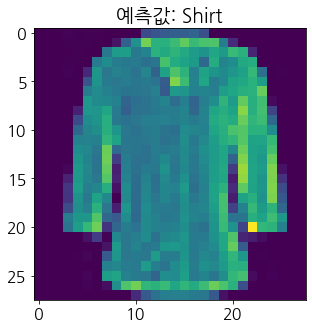

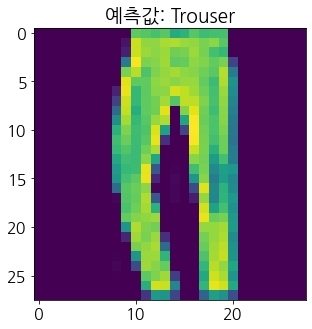

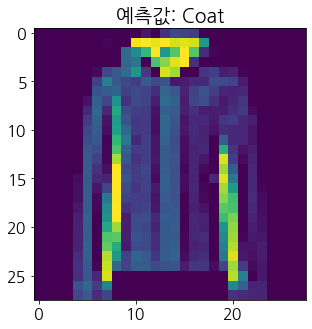

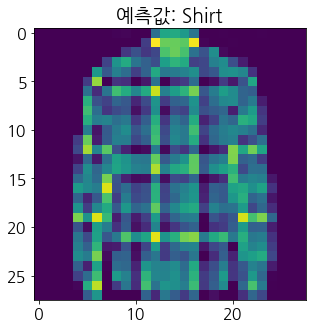

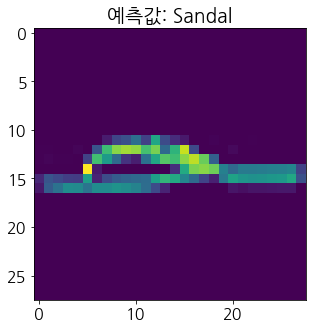

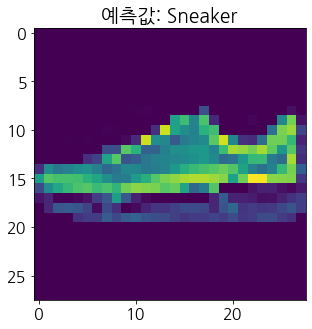

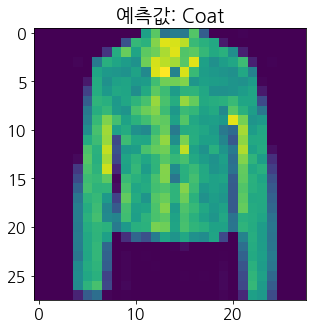

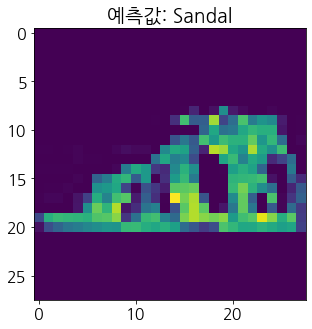

In [20]:
# 예측값 그려서 확인해보기
for i, v in enumerate(arg_results):
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('예측값: ' + class_names[v])
    plt.show()
    
    if i > 10:
        break

### 모델 평가 방법 1 : 혼동 행렬

In [21]:
# 예측데이터(ca_y_test)를 x축으로, 결과 데이터(results)를 y축으로 놓는 오차행렬(confusion_matrix) 생성하기
cm = confusion_matrix(np.argmax(ca_y_test, axis = -1), np.argmax(results, axis = -1))
cm

array([[857,   0,  18,  11,   2,   2, 104,   0,   6,   0],
       [  4, 973,   0,  19,   0,   0,   4,   0,   0,   0],
       [ 17,   1, 834,   6,  71,   0,  69,   0,   2,   0],
       [ 36,   3,  19, 878,  20,   0,  39,   0,   5,   0],
       [  2,   0, 126,  47, 750,   0,  73,   0,   2,   0],
       [  0,   0,   0,   1,   0, 952,   1,  31,   0,  15],
       [132,   1, 100,  18,  48,   0, 692,   0,   9,   0],
       [  0,   0,   0,   0,   0,   7,   0, 966,   0,  27],
       [  5,   1,   6,   4,   2,   5,   8,   6, 963,   0],
       [  0,   0,   0,   1,   0,  11,   1,  40,   0, 947]], dtype=int64)

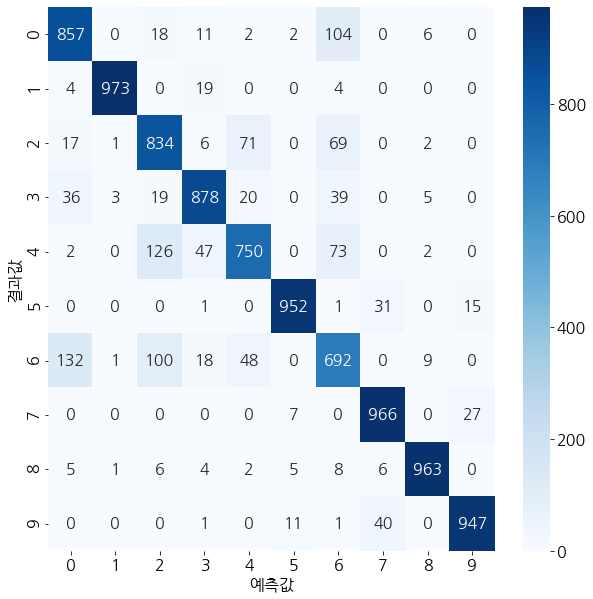

In [22]:
# 오차행렬 시각화
# 5를 분류할 때 가장 많이 혼란스러워한다.
# 오차행렬은 모델의 강점과 약점을 파악하기에 유용하다.

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10, 10)

# 오차행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵(https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

### 모델 평가 방법 2 - 분류 보고서

In [23]:
report = classification_report(np.argmax(ca_y_test, axis = -1),
                              np.argmax(results, axis = -1),
                              output_dict = True)
DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.813865,0.8570,0.834876,1000.0000
1,0.993871,0.9730,0.983325,1000.0000
2,0.756120,0.8340,0.793153,1000.0000
3,0.891371,0.8780,0.884635,1000.0000
4,0.839866,0.7500,0.792393,1000.0000
5,0.974411,0.9520,0.963075,1000.0000
6,0.698285,0.6920,0.695128,1000.0000
7,0.926174,0.9660,0.945668,1000.0000
8,0.975684,0.9630,0.969300,1000.0000
9,0.957533,0.9470,0.952237,1000.0000


### model_type 1과 2의 그래프 비교
- Dense(128)층을 추가한 두 번째 모델 기준

> 장점
1. 첫 번째 모델보다 빠르게 수렴한다.
2. 높은 정확도와 낮은 손실값을 보여준다.

> 단점
1. 훈련 데이터와 검증 데이터간의 간격이 벌어지는 시점이 빠르다.
2. 30에폭을 기준으로 벌어짐의 정도가 더 심하다 -> 과대적합이 발생할 시점이 더 빠르다.

> 결론
- 모델을 깊게 구성하면 높은 성능을 얻을 수 있지만, 모델이 가지는 파라미터의 수가 매우 많아지므로 과대적합 문제에 더 많이 노출될 수 있다. 
- 한 데이터셋이나 유사한 분야에서 높은 성능을 보여주는 다른 모델의 구조를 참고(일반적으로 논문을 통해 참고함)하여 구성해보고 실험을 진행해야한다.